In [196]:
using NPZ
using Dierckx: Spline1D, derivative
using Interpolations
using Plots
using ForwardDiff
using Dierckx

In [197]:
XY = npzread("/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/behavior/src/hairpin.npy");


In [198]:
function upsample(data...; δp=0.001)
    n = length(data)
    P = range(0, 1, length(data[1]))

    # upsample data
    itp = Interpolations.scale(
        interpolate(hcat(data...), (BSpline(Cubic(Natural(OnGrid()))), NoInterp())), P, 1:n
    )

    tfine = 0:δp:1
    upsampled = []
    for i in 1:n
        push!(upsampled, [itp(t, i) for t in tfine])
    end
    return upsampled
end

upsample (generic function with 1 method)

┌ Info: 198
│   length(XY[:, 1]) = 198
└ @ Main /Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/behavior/edit_track_waypoints.ipynb:11


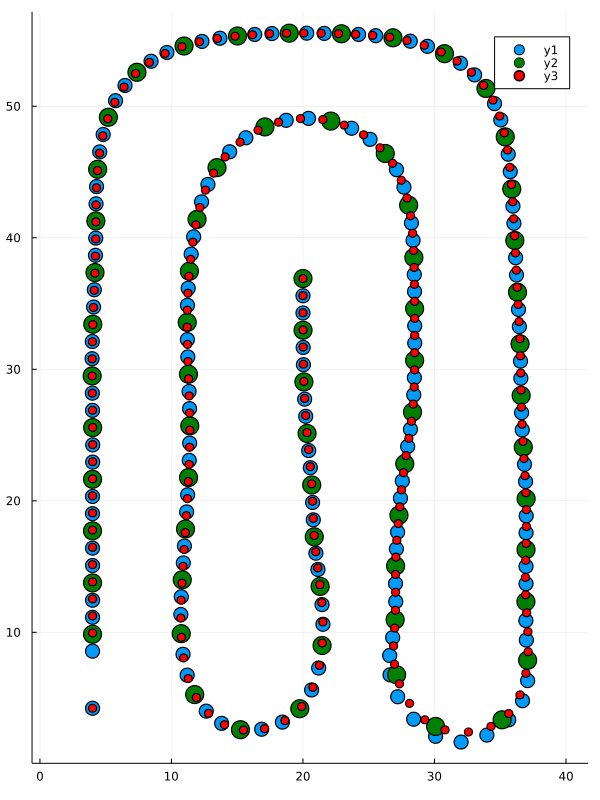

In [199]:
new_XY = XY[1:3:end, :]

new_XY[34, 1] += .5
new_XY[35, 2] += .75
new_XY[36, 1] -= .5

X, Y = upsample(new_XY[:, 1], new_XY[:, 2]; δp=.0051)
X = [X..., XY[end, 1]]
Y = [Y..., XY[end, 2]]

@info length(X) length(XY[:, 1])

plt = scatter(XY[:,1], XY[:,2], aspect_ratio=:equal, size=(600, 800), ms=8)
scatter!(new_XY[:,1], new_XY[:,2], color="green", ms=10)
scatter!(X, Y, color="red", ms=5)

In [200]:
npzwrite("/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/behavior/src/hairpin_new.npy", hcat(X, Y))